# Dataset
## List of stars on the Hollywood Walk of Fame
### Fame network - Who is famooouus?
### Who is the Star of the Stars??
### Look at actor wikipages - look for words and determine their reviews - are they good or bad
### Look at awards (Academy Award, Grammys, etc.) to determine good/bad stars - did they deserve their stars?

List taken from wikipedia. [https://en.wikipedia.org/wiki/List_of_stars_on_the_Hollywood_Walk_of_Fame](https://en.wikipedia.org/wiki/List_of_stars_on_the_Hollywood_Walk_of_Fame)  
List of fictional characters. [https://en.wikipedia.org/wiki/List_of_fictional_characters_with_stars_on_the_Hollywood_Walk_of_Fame](https://en.wikipedia.org/wiki/List_of_fictional_characters_with_stars_on_the_Hollywood_Walk_of_Fame)  
Hollywood Walk of Fame [https://en.wikipedia.org/wiki/Hollywood_Walk_of_Fame](https://en.wikipedia.org/wiki/Hollywood_Walk_of_Fame)

Ideas for Network analysis:  
* Most connected person (Different connectivity measures)
* Most central person (Different centrality measures)
* Who deserve the star the most? (Combine connectivity and centrality)
* Communities of persons: Can we see communities of categories/fields (Motion pictures, Radio, Television, Live performance, Recording)? Can we see communities of when people get their star? Communities of people with same age or birth place or name? Communities of people with multiple stars? Communities of people with awards? Communities of people with same awards (Academy Award with Academy Awards, etc.)? Community of fictional characters?
* Create my own proposed communities and look at modularities
* Use the Python Louvain-algorithm implementation to find best partition and community
* Look at communities, find common text and determine the peoples' connections.
* Least connected person? Use text to find out why
* How well connected is the network? Giant component? weakly connected component? Does all the actors know each other or are there outliers? Find the outliers
* Average shortest paths

Ideas for Plain text (NLP) analysis:
* Similarity between people (find TF-IDF and use similarity measure)?
* Most common words (use TF-IDF and wordcloud)
* Try different logarithms bases in IDF
* Does everybody share some words about Hollywood Walk of Fame?
* Use NLP to test community (use NLP and search for words "award"/"Hollywood Star"/name of person/).

Ideas for awards comparison:
* Who appears in most list of awards, who received the most awards?
* Film category: Academy awards (best actor, best actress, best supporting actor, best supporting actress)
* Television category: Primetime Emmy awards (lead actor comedy, lead actress comedy, lead actor drama, lead actress drama)
* Radio category: Members and Fellows of Radio Academy's Hall of Fame
* Live performance category: Tony awards (leading actor play, leading actress musical, leading actor play, leading actress musical, featured actors/actresses aswell?)
* Recording: Grammy award (Album of the Year, Record of the Year, Song of the Year, Best New Artist)

### Procedure to fetch wikipages from wikia
Wikipages from wikia can either be available to editing or not. If it is not available then the source code can be easily read. If it is available to editing "action=edit" in the query will lead to the visual editor, and the link within double brackets ([[ ... ]]) does not appear. I had to create an account on fandom/wikia in order to change the preffered editing to "source code". That way "action=edit" in the query will lead to the source code of the page and the links within brackets can be found using a regular expression. But the source is written in HTML code, which means we have to look for links between $<$a$>$ and $<$/a$>$.

In [115]:
# This cell is included to show what libraries are imported and used in the project
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
import json
import re
import urllib2
import nltk
from nltk.corpus import stopwords
import string
import math
from wordcloud import WordCloud
import community
%matplotlib inline

In [133]:
# Construct query of page
baseurl = "https://en.wikipedia.org/w/index.php?"
action = "action=edit"
title = "title=List_of_stars_on_the_Hollywood_Walk_of_Fame"
query = "%s%s&%s" % (baseurl, title, action)

print query

# Fetch file using url. urllib2 is used in python 2.7
response = urllib2.urlopen(query)
wikisource = response.read()

https://en.wikipedia.org/w/index.php?title=List_of_stars_on_the_Hollywood_Walk_of_Fame&action=edit


In [134]:
# Use regular expression to get list of stars
# Find all wiki links in the strings from wikisources
brac = re.findall('\[{2}(.+?)\]{2}', wikisource)
stars = brac

# Clean up list of links by removing first elements in list that are not stars
stars = stars[3:]
stars = stars[:-7]
# Delete a links to other places in the list, i.e. links to same wikipage
# Remove vertical lines links
del_idx = []
for idx, star in enumerate(stars):
    if star == "Los Angeles Times":
        del_idx.append(idx)
    match1 = re.search('(.*)\|', star)
    match2 = re.search('(#.+)', star)
    if match1 != None:
        stars[idx] = match1.group(1)
    if match2 != None:
        del_idx.append(idx)
for idx in reversed(del_idx):
    del stars[idx]

In [135]:
for star in stars:
    print star

Bud Abbott
Paula Abdul
Harry Ackerman
Art Acord
Roy Acuff
Bryan Adams
Lou Adler
Stella Adler
Renée Adorée
Antonio Aguilar
Pepe Aguilar
Christina Aguilera
Brian Aherne
Philip Ahn
Alabama (band)
Licia Albanese
Eddie Albert
Frank Albertson
Jack Albertson
Buzz Aldrin
Ben Alexander (actor)
Muhammad Ali
Debbie Allen
Fred Allen
Gracie Allen
Rex Allen
Steve Allen
Tim Allen
Kirstie Alley
Fran Allison
June Allyson
Herb Alpert
Don Alvarado
Don Ameche
America (band)
Adrienne Ames
Morey Amsterdam
Broncho Billy Anderson
Eddie "Rochester" Anderson
Leroy Anderson
Marian Anderson
Mary Anderson (actress, born 1918)
Julie Andrews
The Andrews Sisters
Heather Angel (actress)
Jennifer Aniston
Paul Anka
Ann-Margret
Michael Ansara
Ray Anthony
Roscoe Arbuckle
Army Archerd
Eve Arden
Samuel Z. Arkoff
Richard Arlen
George Arliss
Louis Armstrong
Neil Armstrong
Desi Arnaz
James Arness
Eddy Arnold
Edward Arnold (actor)
Cliff Arquette
Jean Arthur
Dorothy Arzner
Ed Asner
Fred Astaire
Nils Asther
Mary Astor
Gene Austin

In [129]:
# How many stars are there on the Hollywood Walk of Fame?
print "Number of stars/famous people on the Hollywood Walk of Fame: " + str(len(stars))

Number of stars/famous people on the Hollywood Walk of Fame: 2277


In [6]:
"""# Get wikipages for stars   
# Standard actions for query
baseurl = "https://en.wikipedia.org/w/index.php?"
action = "action=edit"
editintro = "editintro=Template:BLP_editintro"

star_count = 0
for star in stars:
    name = re.sub('[ ]', '_', star)
    title = "title=" + name
    query = "%s%s&%s&%s" % (baseurl, title, action, editintro)
    # Use constructed query to fetch url
    response = urllib2.urlopen(query)
    wikisource = response.read()
    # Write json file to folder 'wikipages'
    file_name = "Hollywood_Stars/" + name
    f = open(file_name, "w")
    f.write(wikisource)
    f.close()
    # Print progress
    star_count += 1
    if 100.0*star_count/len(stars) % 5 < 0.05:
        print "The loop is %f percent done" % (100.0*star_count/len(stars))"""

'# Get wikipages for stars   \n# Standard actions for query\nbaseurl = "https://en.wikipedia.org/w/index.php?"\naction = "action=edit"\neditintro = "editintro=Template:BLP_editintro"\n\n# 2155\nstar_count = 0\nfor star in stars:\n    name = re.sub(\'[ ]\', \'_\', star)\n    title = "title=" + name\n    query = "%s%s&%s&%s" % (baseurl, title, action, editintro)\n    # Use constructed query to fetch url\n    response = urllib2.urlopen(query)\n    wikisource = response.read()\n    # Write json file to folder \'wikipages\'\n    file_name = "Hollywood_Stars/" + name\n    f = open(file_name, "w")\n    f.write(wikisource)\n    f.close()\n    # Print progress\n    star_count += 1\n    if 100.0*star_count/len(stars) % 5 < 0.05:\n        print "The loop is %f percent done" % (100.0*star_count/len(stars))'

In [7]:
# Find what wikipages link to what wikipages
# Extract link from wikipage and see if link is in list of stars

# <a.*?>(.+?)</a>

# Create directed graph. While looping construct edges in graph
G = nx.DiGraph()
G.add_nodes_from([star for star in stars])

star_count = 0
for star in stars:
    # Read wikipage from file in folder 'wikipages'
    name = re.sub('[ ]', '_', star)
    file_name = "Hollywood_Stars/" + name
    f = open(file_name, "r")
    # Extracts links which are in brackets
    text = f.read()
    brac = re.findall('\[{2}(.+?)\]{2}', text)
    #print brac
    # Save links to other stars in network (directed graph)
    for link in brac:
        if link in stars:
            G.add_edge(star, link)
    f.close()
    # Print progress
    star_count += 1
    if 100.0*star_count/len(stars) % 10 < 0.05:
        print "The loop is %f percent done" % (100.0*star_count/len(stars))

The loop is 0.043459 percent done
The loop is 10.039113 percent done
The loop is 20.034767 percent done
The loop is 30.030422 percent done
The loop is 40.026076 percent done
The loop is 50.021730 percent done
The loop is 60.017384 percent done
The loop is 70.013038 percent done
The loop is 80.008692 percent done
The loop is 90.004346 percent done
The loop is 90.047805 percent done
The loop is 100.000000 percent done


In [8]:
print "Number of nodes in Hollywood Star network: " + str(len(G.nodes()))
print "Number of edges in Hollywood Star network: " + str(len(G.edges()))

Number of nodes in Hollywood Star network: 2295
Number of edges in Hollywood Star network: 25105


In [9]:
# Find stars' outgoing degrees by simply looking at their degrees in the graph
degrees_out = G.degree() #Dictionary of stars with their outgoing degrees as values

# Find stars' ingoing degrees by looking at the reversed graph
#G_rev = G.reverse()
#degrees_in = G_rev.degree() #Dictionary of philosophers with their ingoing degrees as values

# Find stars' ingoing degrees by counting how many times they are pointed to
degrees_in = {} #Dictionary of philosophers with their ingoing degrees as values
for phil in G.nodes():
    count = 0
    for linkto in [edge[1] for edge in G.edges()]:
        if phil == linkto:
            count += 1
    degrees_in[phil] = count

# Extract top 10 items with highest in- and out-degrees from dictionaries
top10_in = sorted(degrees_in.iteritems(), key=lambda (k, v): (-v, k))[:10]
top10_out = sorted(degrees_out.iteritems(), key=lambda (k, v): (-v, k))[:10]

# Print top 10 stars with ingoing and outgoing links
print "Top 10 Hollywood Stars by in-degree:"
for i in range(10):
    print top10_in[i][0] + ": " + str(top10_in[i][1])
print "\nTop 10 Hollywood Stars by out-degree:"
for i in range(10):
    print top10_out[i][0] + ": " + str(top10_out[i][1])

Top 10 Hollywood Stars by in-degree:
Frank Sinatra: 209
Elvis Presley: 156
Associated Press: 145
Bing Crosby: 143
John Wayne: 142
Ronald Reagan: 135
Bob Hope: 125
Bette Davis: 122
The Simpsons: 121
Katharine Hepburn: 113

Top 10 Hollywood Stars by out-degree:
Frank Sinatra: 301
John Ford: 195
Cary Grant: 193
Bette Davis: 190
Bing Crosby: 189
Elvis Presley: 189
Gary Cooper: 189
James Stewart: 180
John Wayne: 178
Clark Gable: 177


In [10]:
# Find min and max values for ingoing and outgoing degrees
min_deg_in = min(degrees_in.values())
max_deg_in = max(degrees_in.values())
min_deg_out = min(degrees_out.values())
max_deg_out = max(degrees_out.values())

# Bin the degree distributions
numBims = 50
bins_in = np.histogram(degrees_in.values(), bins=numBims)
bins_out = np.histogram(degrees_out.values(), bins=numBims)

# Find the centers for each bin
bin_centers_in = []
bin_centers_out = []
for i in range(len(bins_in[1])-1):
    center = (bins_in[1][i]+bins_in[1][i+1])/2
    bin_centers_in.append(center)
for i in range(len(bins_out[1])-1):
    center = (bins_out[1][i]+bins_out[1][i+1])/2
    bin_centers_out.append(center)

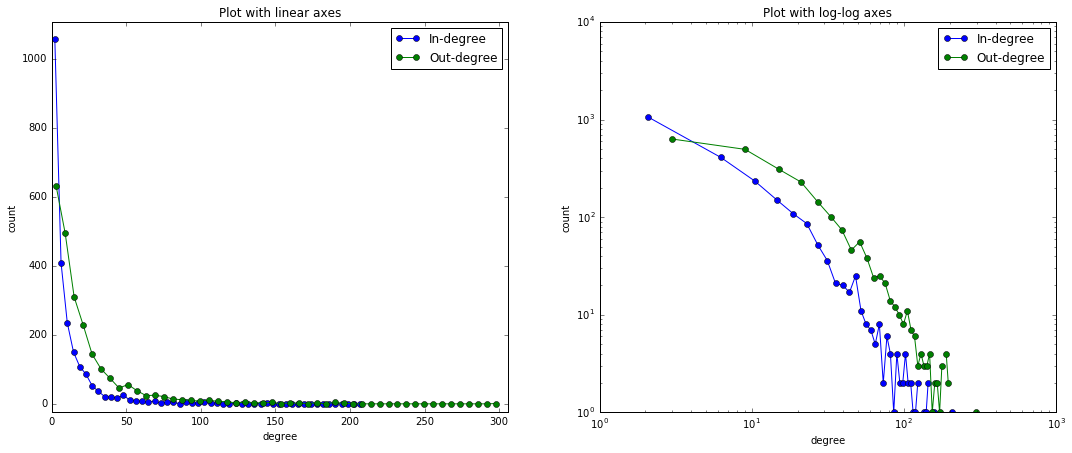

In [11]:
# Plot degree distributions with linear axis
plt.figure(figsize=(18, 7))

plt.subplot(121)
line1,=plt.plot(bin_centers_in, bins_in[0], 'bo-', label='In-degree')
line2,=plt.plot(bin_centers_out, bins_out[0], 'go-', label='Out-degree')
plt.axis([0, max(max_deg_in,max_deg_out)+5, -25, max(max(bins_in[0]),max(bins_out[0]))+50])
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with linear axes')
plt.legend(handles=[line1,line2])

plt.subplot(122)
line3,=plt.loglog(bin_centers_in, bins_in[0], 'bo-', label='In-degree')
line4,=plt.loglog(bin_centers_out, bins_out[0], 'go-', label='Out-degree')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with log-log axes')
plt.legend(handles=[line3,line4])

#plt.savefig('deg_dist.jpg')

In [12]:
# Plot the graph
#nx.draw(G, node_size=30, node_color="#A0CBE2")
#plt.savefig("Hollywood_Graph.png", format="PNG")
#plt.show()

In [13]:
# Look at wikipages for different awards and categories
# Add attributes to nodes in star network

# Standard actions for queries
baseurl = "https://en.wikipedia.org/w/index.php?"
action = "action=edit"
titles = ["Academy_Award_for_Best_Actor", 
          "Academy_Award_for_Best_Actress", 
          "Academy_Award_for_Best_Supporting_Actor", 
          "Academy_Award_for_Best_Supporting_Actress",
          "Primetime_Emmy_Award_for_Outstanding_Lead_Actor_in_a_Drama_Series", 
          "Primetime_Emmy_Award_for_Outstanding_Lead_Actor_in_a_Comedy_Series", 
          "Primetime_Emmy_Award_for_Outstanding_Lead_Actress_in_a_Drama_Series", 
          "Primetime_Emmy_Award_for_Outstanding_Lead_Actress_in_a_Comedy_Series", 
          "Radio_Academy", 
          "Tony_Award_for_Best_Actor_in_a_Play", 
          "Tony_Award_for_Best_Actor_in_a_Musical", 
          "Tony_Award_for_Best_Actress_in_a_Play", 
          "Tony_Award_for_Best_Actress_in_a_Musical", 
          "Grammy_Award_for_Album_of_the_Year", 
          "Grammy_Award_for_Record_of_the_Year", 
          "Grammy_Award_for_Song_of_the_Year", 
          "Grammy_Award_for_Best_New_Artist"]

# Construct queries of pages
queries = []
for t in titles:
    title = "title=" + t
    query = "%s%s&%s" % (baseurl, title, action)
    queries.append(query)

# Query for all wikipages of awards
award_wikisources = []
for query in queries:
    response = urllib2.urlopen(query)
    wikisource = response.read()
    award_wikisources.append(wikisource)

In [14]:
# Create dictionary of stars as keys and number of awards as values
awards = {}
for star in G.nodes():
    awards[star] = 0

# Count awards for each star
for wikisource in award_wikisources:
    # Use regular expression to get list of stars in award wikipages
    brac = re.findall('\[{2}(.+?)\]{2}', wikisource)
    # See if the stars are mentioned (is a link) in award wikipage
    for link in brac:
        if link in awards:
            awards[link] += 1
            
print "Awards counted in total: " + str(sum(awards.values()))

Awards counted in total: 2324


In [15]:
# Add node attributes to graph using dictionary of awards
nx.set_node_attributes(G, 'awards', awards)

In [16]:
# Create a list of stars that have no edges and are not connected to the big component
lonely_stars = []
for node in G.nodes():
    if not G.edges(node):
        print node
        lonely_stars.append(node)

Clyde Cook (actor)
Harry Carey, Jr.
Chuck Niles
Sidney Franklin (director)
Alan Hale, Jr.
Teller (entertainer)
Dick Haynes
Herbert Kalmus
Tavis Smiley
The Mark &amp; Brian Show
Deidre Hall
Art Baker (actor)
Charles Champlin
Blue Barron
Mr. &amp; Mrs. Sidney Drew
Hal Fishman
Larry McCormick (TV)
Kenny Baker (American singer and actor)
Al Pearce
Charles Murray (American actor)
Guy Laliberté
Larry Elder
Glen Gray
David Gerber
Jeannie Carson
The Spinners (American R&amp;B group)
Brian Beirne
Jack H. Harris
Robert Evans (producer)
Charles Ruggles
David Powell (actor)
Tom Brown (actor)
Olga Petrova
Michael York (actor)
Simon Baker
George Meeker
Delbert Mann
Tom Breneman
Elton Britt
Crosby, Stills, Nash &amp; Young
Al Goodman
Lee De Forest
Fay Bainter
Evelyn Knight
Signe Hasso
Everett Mitchell
Milton Cross
Hall &amp; Oates
Toshiro Mifune
Andrew L. Stone
Noah Beery, Jr.
Richard Dix (actor)
Johnny Hayes (DJ)
Frazier Hunt
The Sons of the Pioneers
Henry Morgan (comedian)
Bill Geist
Jean Negulesco

## Look at centrality measures
* Degree centrality
* Betweenness centrality
* Eigenvector centrality
* Closeness centrality

In [19]:
# Degree centrality
# This is basically expressed through the degree distribution seen above, so for this centrality measure look above
# Degree centrality of a node is its number of links

In [20]:
# Betweenness centrality
# Calculate the betweenness centrality using NetworkX function. G is the directed NetworkX graph of wiki articles.
betw_cen = nx.betweenness_centrality(G)

# Extract top 10 items with highest betweenness centrality from dictionary
top10_betw = sorted(betw_cen.iteritems(), key=lambda (k, v): (-v, k))[:10]

# Print top 10 stars with highest betweenness centrality
print "Top 10 stars by betweenness centrality:"
for i in range(10):
    print top10_betw[i][0] + ": " + str(top10_betw[i][1])

Top 10 stars by betweenness centrality:
Frank Sinatra: 0.0470357216156
Bing Crosby: 0.0197991392387
Elvis Presley: 0.0187000887206
John Ford: 0.0186254604678
Cary Grant: 0.0179698017241
Bette Davis: 0.0155034066514
Barbra Streisand: 0.0146857132213
Clark Gable: 0.0146735981137
Dean Martin: 0.0146296424248
Gary Cooper: 0.014626519893


In [21]:
# Eigenvector centrality

# Compute eigenvector centrality using NetworkX

# Eigenvector centrality for in-degree
eig_cent_in = nx.eigenvector_centrality(G)

# Eigenvector centrality for out-degree, computed in the same way but with the reversed graph
eig_cent_out = nx.eigenvector_centrality(G.reverse())

# Extract top 10 items with highest eigenvector centrality from dictionaries
top10_eig_in = sorted(eig_cent_in.iteritems(), key=lambda (k, v): (-v, k))[:10]
top10_eig_out = sorted(eig_cent_out.iteritems(), key=lambda (k, v): (-v, k))[:10]

# Print top 10 stars with highest eigenvector centrality
print "Top 10 stars by eigenvector centrality for in-degree:"
for i in range(10):
    print top10_eig_in[i][0] + ": " + str(top10_eig_in[i][1])
print "\nTop 10 stars by eigenvector centrality for out-degree:"
for i in range(10):
    print top10_eig_out[i][0] + ": " + str(top10_eig_out[i][1])

Top 10 stars by eigenvector centrality for in-degree:
Frank Sinatra: 0.176160682924
Clark Gable: 0.151446400612
Katharine Hepburn: 0.150212697885
Cary Grant: 0.148324372284
James Stewart: 0.144675018684
Bette Davis: 0.140816059603
Ronald Reagan: 0.137407799121
Humphrey Bogart: 0.132815103701
Gary Cooper: 0.127656995666
Joan Crawford: 0.118665187319

Top 10 stars by eigenvector centrality for out-degree:
George Cukor: 0.1782702519
John Ford: 0.14463197164
George Raft: 0.140006145813
James Stewart: 0.138889606963
Gary Cooper: 0.128447681468
Humphrey Bogart: 0.125297869012
Cary Grant: 0.121596914837
Howard Hawks: 0.120388650736
Michael Curtiz: 0.119717246967
Clark Gable: 0.118266234528


In [22]:
# Closeness centrality

# This centrality measure assumes that the graph is connected, i.e. all nodes have at least one edge
# First test if all nodes have et least one edge
G_ud = G.to_undirected()
print "The graph is connected: " + str(nx.is_connected(G_ud))

# Closeness cenrrality can still be computed, unreachable nodes does just not contribute.

# Remove unreacheable nodes
#for node in G.nodes():
#    if not G.edges(node):
#        print node

The graph is connected: False


In [23]:
# Compute closeness centrality using NetworkX

# Closeness centrality for in-degree
close_cent_in = nx.closeness_centrality(G)

# Extract top 10 items with highest closeness centrality from dictionaries
top10_close = sorted(close_cent_in.iteritems(), key=lambda (k, v): (-v, k))[:10]

# Print top 10 stars with highest closeness centrality
print "Top 10 stars by closeness centrality:"
for i in range(10):
    print top10_close[i][0] + ": " + str(top10_close[i][1])

Top 10 stars by closeness centrality:
Frank Sinatra: 0.311318429674
George Cukor: 0.309691438886
Cary Grant: 0.309132204747
James Stewart: 0.309008204664
George Raft: 0.307098845616
Michael Curtiz: 0.306732014425
John Ford: 0.30654892727
Howard Hawks: 0.304489112343
Gary Cooper: 0.300803379238
Mae West: 0.299342317555


## Community detection and analysis

In [24]:
# Compute the best partition
part = community.best_partition(G_ud)

# Find number of communities
n_c = 0
for node in part:
    if part[node] > n_c:
        n_c = part[node]
print "Number of communities in partition: " + str(n_c+1)

# Put nodes into sets that correspond to communities
part_sets = [set() for i in range(n_c+1)]
for node in part:
    part_sets[part[node]].add(node)

Number of communities in partition: 108


In [25]:
# Calculate the modularity using eqution 9.12 in the Network Science book

# Function to compute equation 9.12
def partition_modularity(G, communities):
    L = float(len(G.edges())) #Total number of links in graph
    n_c = len(communities) #Number of communities
    L_c = [0.0 for i in range(n_c)] #Number of links in communities
    k_c = [0.0 for i in range(n_c)] #Total degree of the nodes in communities
    
    for idx, c in enumerate(communities):
        for node in c:
            L_c[idx] += len(G.edges(node))
            k_c[idx] += G.degree(node)
    
    M = 0
    for i in range(n_c):
        M += (L_c[i]/L)-(k_c[i]/(2*L))**2
    return M

In [26]:
# Calculate modularity for this partition
M_part = partition_modularity(G, part_sets)
print "Modularity for this partition: " + str(M_part)

Modularity for this partition: 0.759211458459


In [27]:
# How many stars in communities?
count = 0
print "Communities with more than one star: "
star_comms = []
for idx, comm in enumerate(part_sets):
    if len(comm) > 1:
        print idx
        star_comms.append(idx)
    if len(comm) == 1:
        count += 1

print "\nNumber of communities with one star: " + str(count)

Communities with more than one star: 
0
1
2
3
4
7
8
15
36
38
88

Number of communities with one star: 97


In [28]:
# Compute degree assortativity coefficient of undirected graph
deg_assort = nx.degree_assortativity_coefficient(G_ud)
print deg_assort

0.0125459226383


#### Create proposed communities
Communities of persons: Can we see communities of categories/fields (Motion pictures, Radio, Television, Live performance, Recording)? Can we see communities of when people get their star? Communities of people with same age or birth place or name? Communities of people with multiple stars? Communities of people with awards? Communities of people with same awards (Academy Award with Academy Awards, etc.)? Community of fictional characters?

In [182]:
# Find the category of each star (Motion picture, Televsion, Radio, Recording, Live Performance)
# If a star has more than one category, the code only finds and saves the first one

# Construct query of page
baseurl = "https://en.wikipedia.org/w/index.php?"
action = "action=edit"
title = "title=List_of_stars_on_the_Hollywood_Walk_of_Fame"
query = "%s%s&%s" % (baseurl, title, action)

print query

# Fetch file using url. urllib2 is used in python 2.7
response = urllib2.urlopen(query)
wikisource = response.read()

# Find stars and categories with regular expression
brac = re.findall('\[{2}(.+?)\]{2}.*\|{2} (.+) \|{2}', wikisource)
stars = brac

https://en.wikipedia.org/w/index.php?title=List_of_stars_on_the_Hollywood_Walk_of_Fame&action=edit


In [183]:
# Delete a links to other places in the list, i.e. links to same wikipage
# Remove vertical lines links
del_idx = []
inserts = []
for idx, star in enumerate(stars):
    match1 = re.search('(.*)\|', star[0])
    match2 = re.search('(#.+)', star[0])
    if match1 != None:
        del_idx.append(idx)
        inserts.append((match1.group(1), star[1]))
    elif match2 != None:
        del_idx.append(idx)
    elif G.has_node(star[0]) == False:
        del_idx.append(idx)
for idx in reversed(del_idx):
    del stars[idx]
for tup in inserts:
    stars.append(tup)

In [184]:
print "Number of stars/famous people on the Hollywood Walk of Fame: " + str(len(stars))
for star in stars:
    print star

Number of stars/famous people on the Hollywood Walk of Fame: 2277
('Bud Abbott', 'Radio')
('Paula Abdul', 'Recording')
('Harry Ackerman', 'Television')
('Art Acord', 'Motion pictures')
('Roy Acuff', 'Recording')
('Bryan Adams', 'Recording')
('Lou Adler', 'Recording')
('Stella Adler', 'Live performance')
('Ren\xc3\xa9e Ador\xc3\xa9e', 'Motion pictures')
('Antonio Aguilar', 'Recording')
('Pepe Aguilar', 'Recording')
('Christina Aguilera', 'Recording')
('Brian Aherne', 'Television')
('Philip Ahn', 'Motion pictures')
('Licia Albanese', 'Recording')
('Eddie Albert', 'Television')
('Frank Albertson', 'Motion pictures')
('Jack Albertson', 'Television')
('Buzz Aldrin', 'Television')
('Muhammad Ali', 'Live performance')
('Debbie Allen', 'Television')
('Fred Allen', 'Radio')
('Gracie Allen', 'Television')
('Rex Allen', 'Motion pictures')
('Steve Allen', 'Television')
('Tim Allen', 'Motion pictures')
('Kirstie Alley', 'Motion pictures')
('Fran Allison', 'Television')
('June Allyson', 'Motion pict

In [185]:
# Convert list of tuples to dictionary
stars_cat = dict(stars)

print stars_cat

{'Suzanne Somers': 'Television', 'Herb Alpert': 'Recording', 'Gilbert Roland': 'Motion pictures', 'Merle Oberon': 'Motion pictures', 'Barbara La Marr': 'Motion pictures', 'George Cukor': 'Motion pictures', 'Fred Travalena': 'Live performance', 'Dom DeLuise': 'Motion pictures', 'Reba McEntire': 'Recording', 'Harrison Ford (silent film actor)': 'Motion pictures', 'Elmo Lincoln': 'Motion pictures', 'Norman Z. McLeod': 'Motion pictures', 'John Conte (actor)': 'Television', 'Randy Travis': 'Recording', 'Hugh Hefner': 'Television', 'Hans Conried': 'Television', 'Jimmy Durante': 'Motion pictures', 'Henry Hathaway': 'Motion pictures', 'Donald Duck': 'Motion pictures', 'Dorothy Lamour': 'Motion pictures', 'Eddy Arnold': 'Radio', 'Kay Starr': 'Recording', 'Betty Blythe': 'Motion pictures', 'Earl Holliman': 'Television', 'William A. Seiter': 'Motion pictures', 'Al Schmitt': 'Recording', 'The Muppets': 'Motion pictures', 'Clyde Cook (actor)': 'Motion pictures', 'Stephen Schwartz (composer)': 'Live

In [190]:
# Add node attributes to graph using dictionary of categories
#nx.set_node_attributes(G, 'category', stars_cat)

In [191]:
# Put stars of different categories in communities represented as sets
# Index follows (Motion pictures, Televsion, Radio, Recording, Live performance)
cat_comms = [set() for i in range(5)]
for star in G.nodes():
    if stars_cat.get(star) == None:
        continue
    elif stars_cat[star] == 'Motion pictures':
        cat_comms[0].add(star)
    elif stars_cat[star] == 'Television':
        cat_comms[1].add(star)
    elif stars_cat[star] == 'Recording':
        cat_comms[2].add(star)
    elif stars_cat[star] == 'Radio':
        cat_comms[3].add(star)
    elif stars_cat[star] == 'Live performance':
        cat_comms[4].add(star)
        
# How many stars in each category?
for cat in cat_comms:
    print len(cat)
# The count does corresponds exactly with number of stars in network
# This is caused by not all categories to stars was found

1126
482
420
188
43


In [193]:
# Put stars with awards in community and stars without in community
award_comms = [set() for i in range(2)]
for star in G.nodes():
    if awards.get(star) == None:
        continue
    elif awards[star] == 0:
        award_comms[0].add(star)
    elif awards[star] > 0:
        award_comms[1].add(star)

# How many stars in each community?
for comm in award_comms:
    print len(comm)

1671
624


In [192]:
stars_cat["Victoria's Secret#Victoria's Secret Angels"]

'Special'

In [226]:
# Fetch list of fictional characters on the Hollywood Walk of Fame

# Construct query of page
baseurl = "https://en.wikipedia.org/w/index.php?"
action = "action=edit"
title = "title=List_of_fictional_characters_with_stars_on_the_Hollywood_Walk_of_Fame"
query = "%s%s&%s" % (baseurl, title, action)

print query

# Fetch file using url. urllib2 is used in python 2.7
response = urllib2.urlopen(query)
wikisource = response.read()

# Find stars and categories with regular expression
brac = re.findall('\[{2}(.+?)\]{2}', wikisource)
stars = brac

https://en.wikipedia.org/w/index.php?title=List_of_fictional_characters_with_stars_on_the_Hollywood_Walk_of_Fame&action=edit


In [228]:
# Put stars of fictional characters in community
fict_comm = set()
for star in stars:
    if G.has_node(star):
        fict_comm.add(star)

# How many fictional characters in community?
print len(fict_comm)

21


In [230]:
# Calculate modularities for different partitions
modularity_best = partition_modularity(G, part_sets)
print "Modularity for this partition: " + str(modularity_best)
modularity_cat = partition_modularity(G, cat_comms)
print "Modularity for this partition: " + str(modularity_cat)
modularity_award = partition_modularity(G, award_comms)
print "Modularity for this partition: " + str(modularity_award)
modularity_fict = partition_modularity(G, [fict_comm])
print "Modularity for this partition: " + str(modularity_fict)

Modularity for this partition: 0.759211458459
Modularity for this partition: 0.569377062464
Modularity for this partition: 0.495089221962
Modularity for this partition: 0.00601468217077


## Plain text analysis

In [29]:
"""# Get readable wikipages for all stars

# Standard actions for query
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=max&explaintext"
dataformat = "format=json"

star_count = 0
for star in G.nodes():
    name = re.sub('[ ]', '_', star)
    title = "titles=" + name
    query = "%s%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)
    # Use constructed query to fetch url
    response = urllib2.urlopen(query)
    wikisource = response.read()
    # Write json file to folder 'wikipages'
    file_name = "star_wikipages/" + name
    f = open(file_name, "w")
    f.write(wikisource)
    f.close()
    # Print progress
    star_count += 1
    if 100.0*star_count/len(G.nodes()) % 5 < 0.05:
        print "The loop is %f percent done" % (100.0*star_count/len(G.nodes()))"""

'# Get readable wikipages for all stars\n\n# Standard actions for query\nbaseurl = "https://en.wikipedia.org/w/api.php?"\naction = "action=query"\ncontent = "prop=extracts&exlimit=max&explaintext"\ndataformat = "format=json"\n\nstar_count = 0\nfor star in G.nodes():\n    name = re.sub(\'[ ]\', \'_\', star)\n    title = "titles=" + name\n    query = "%s%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)\n    # Use constructed query to fetch url\n    response = urllib2.urlopen(query)\n    wikisource = response.read()\n    # Write json file to folder \'wikipages\'\n    file_name = "star_wikipages/" + name\n    f = open(file_name, "w")\n    f.write(wikisource)\n    f.close()\n    # Print progress\n    star_count += 1\n    if 100.0*star_count/len(G.nodes()) % 5 < 0.05:\n        print "The loop is %f percent done" % (100.0*star_count/len(G.nodes()))'

In [30]:
# Define function to tokenize and exclude the right elements from text
def tokenize(text):
    # Tokenize text using same approach as in textbook, ch. 3.7. Exclude digits and punctuation.
    re_tokens = nltk.regexp_tokenize(text, r"\w+") 
    
    # Remove stopwords and standalone letters while setting to lowercase
    tokens = []
    for token in re_tokens:
        if (token.lower() not in stopwords.words('english')
            and token.lower() not in list(string.ascii_lowercase)):
            tokens.append(token.lower())
            
    return tokens

In [31]:
# Tokenize the pages and generate one large documents
doc = [] #List to contain tokens for each star wikipage

# For each star tokenize text and extend it to document
star_count = 0
for star in G.nodes():
    # Read wikipage from file in folder 'star_wikipages'
    name = re.sub('[ ]', '_', star)
    file_name = "star_wikipages/" + name
    f = open(file_name, "r")
    wikipage = json.dumps(f.read())
    f.close()
    tokens = list(set(tokenize(wikipage))) #List of words on star wikipage
    doc.extend(tokens)
    # Print progress
    star_count += 1
    if 100.0*star_count/len(G.nodes()) % 5 < 0.05:
        print "The loop is %f percent done" % (100.0*star_count/len(G.nodes()))
        
# Length of large documents
print len(doc)

The loop is 0.043573 percent done
The loop is 5.010893 percent done
The loop is 10.021786 percent done
The loop is 15.032680 percent done
The loop is 20.000000 percent done
The loop is 20.043573 percent done
The loop is 25.010893 percent done
The loop is 30.021786 percent done
The loop is 35.032680 percent done
The loop is 40.000000 percent done
The loop is 40.043573 percent done
The loop is 45.010893 percent done
The loop is 50.021786 percent done
The loop is 55.032680 percent done
The loop is 60.000000 percent done
The loop is 60.043573 percent done
The loop is 65.010893 percent done
The loop is 70.021786 percent done
The loop is 75.032680 percent done
The loop is 80.000000 percent done
The loop is 80.043573 percent done
The loop is 85.010893 percent done
The loop is 90.021786 percent done
The loop is 95.032680 percent done
The loop is 100.000000 percent done
1778077


In [32]:
# Convert list of tokens to dictionary of unique tokens with their count as values
# This can be used for TF values for the large document
token_dic = {}

# Count occurence of each word in the large document
for token in doc:
    if token not in token_dic:
        token_dic[token] = 1
    else:
        token_dic[token] += 1

# Print number of total count for dictionary. Should be equal to length of star document
print sum(token_dic.values())

1778077


In [33]:
# Calculate IDF
token_idf = {} #Dictionary of each unique word with its IDF as value

# Count occurence of each word in the large document
for token in doc:
    if token not in token_idf:
        token_idf[token] = 1
    else:
        token_idf[token] += 1
# Now calculate IDF for each word. Logarithm with 1000 base is used
for token in token_idf:
    token_idf[token] = math.log(float(len(G.nodes()))/(token_idf[token]), 1000)

In [34]:
# Calcualte TF-IDF for each branch
tf_idf = {} #List to contain TF-IDF for each token in star wikipages

for token in token_dic:
    tf_idf[token] = token_dic[token] * token_idf[token]

In [35]:
# Print top 10 words in terms TF-IDF
top10_tf_idf = sorted(tf_idf.iteritems(), key=lambda (k, v): (-v, k))[:10]
print "Top 10 tokens:"
for j in range(10):
    print top10_tf_idf[j][0] + ": " + str(top10_tf_idf[j][1])

Top 10 tokens:
book: 122.222276167
met: 122.222276167
theatre: 122.222276167
industry: 122.222081277
season: 122.222081277
history: 122.221603239
still: 122.2213461
15: 122.220953067
lived: 122.220130556
top: 122.220130556


The loop is 0.000954 percent done
The loop is 5.000620 percent done
The loop is 10.000286 percent done
The loop is 15.000907 percent done
The loop is 20.000573 percent done
The loop is 25.000239 percent done
The loop is 30.000859 percent done
The loop is 35.000525 percent done
The loop is 40.000191 percent done
The loop is 45.000811 percent done
The loop is 50.000477 percent done
The loop is 55.000143 percent done
The loop is 60.000763 percent done
The loop is 65.000429 percent done
The loop is 70.000095 percent done
The loop is 75.000716 percent done
The loop is 80.000382 percent done
The loop is 85.000048 percent done
The loop is 90.000668 percent done
The loop is 95.000334 percent done
The loop is 100.000000 percent done


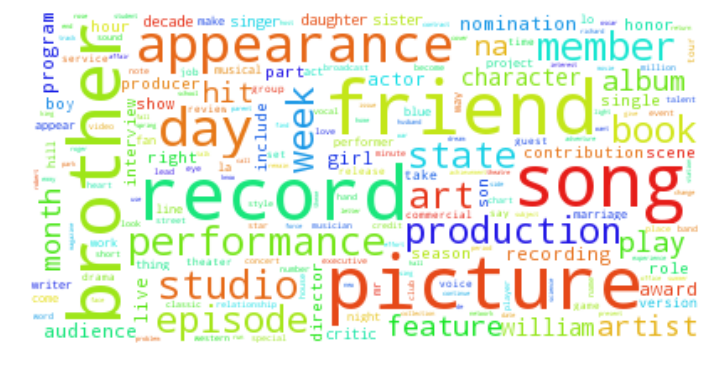

In [114]:
# Convert tokens in documents into long strings using TF-IDF scores
text = ""
token_count = 0
for token in tf_idf:
    for i in range(int(tf_idf[token])):
        text = text + " " + token
    # Print progress
    token_count += 1
    if 100.0*token_count/len(tf_idf) % 5 < 0.001:
        print "The loop is %f percent done" % (100.0*token_count/len(tf_idf))

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=45,
                      background_color='white').generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

pic_name = 'word_cloud_all.jpg'
#plt.savefig(pic_name)

In [37]:
# Now find similarities for communities. Best partition and lonely stars
# Tokenize the pages and generate one large documents

# List to contain large document for each star community
docs = [[] for i in range(len(star_comms)+1)]

# Iterate through each community in best partition
for i in range(len(docs)-1):
    # For each star tokenize text and extend it to document
    for star in part_sets[i]:
        # Read wikipage from file in folder 'star_wikipages'
        name = re.sub('[ ]', '_', star)
        file_name = "star_wikipages/" + name
        f = open(file_name, "r")
        wikipage = json.dumps(f.read())
        f.close()
        tokens = list(set(tokenize(wikipage))) #List of words on star wikipage
        docs[i].extend(tokens)
    # Print progress
    print "Done with community %d out of %d" % (i+1, len(docs))
# Create large document for 'lonely stars'
for star in lonely_stars:
        # Read wikipage from file in folder 'star_wikipages'
        name = re.sub('[ ]', '_', star)
        file_name = "star_wikipages/" + name
        f = open(file_name, "r")
        wikipage = json.dumps(f.read())
        f.close()
        tokens = list(set(tokenize(wikipage))) #List of words on star wikipage
        docs[len(docs)-1].extend(tokens)
# Print progress
print "Done with community %d out of %d" % (len(docs), len(docs))
        
# Length of documents (lists)
for doc in docs:
    print len(doc)

Done with community 1 out of 12
Done with community 2 out of 12
Done with community 3 out of 12
Done with community 4 out of 12
Done with community 5 out of 12
Done with community 6 out of 12
Done with community 7 out of 12
Done with community 8 out of 12
Done with community 9 out of 12
Done with community 10 out of 12
Done with community 11 out of 12
Done with community 12 out of 12
353437
444021
452692
273193
166494
67
41
13340
53515
25
114
34771


In [38]:
# Convert lists of tokens to dictionaries of unique tokens with their count as values
# This can be used for TF values for the large document
token_dics = [{} for i in range(len(docs))]

for idx, doc in enumerate(docs):
    for token in doc:
        if token not in token_dics[idx]:
            token_dics[idx][token] = 1
        else:
            token_dics[idx][token] += 1

# Print number of total count for each dictionary. Should be equal to length of community documents
for dic in token_dics:
    print sum(dic.values())

353437
444021
452692
273193
166494
67
41
13340
53515
25
114
34771


In [81]:
# Calculate IDF
token_idf = {} #Dictionary of each unique word in all documents with its IDF as value

# Count occurence of each word in the documents
for doc in token_dics:
    for token in doc:
        if token not in token_idf:
            token_idf[token] = 1
        else:
            token_idf[token] += 1
# Now calculate IDF for each word. Logarithm with 2 base is used
for token in token_idf:
    token_idf[token] = math.log(float(len(docs))/(token_idf[token]), 100)

In [82]:
# Calcualte tf-idf for each community
tf_idf_comms = [{} for i in range(len(token_dics))] #List to contain TF-IDF for each token in each community

for idx, doc in enumerate(token_dics):
    for token in doc:
        tf_idf_comms[idx][token] = doc[token] * token_idf[token]

In [83]:
# Print top 10 words for each community
for i in range(len(tf_idf_comms)):
    # Extract top 10 items with highest TF-IDF from dictionaries
    top10 = sorted(tf_idf_comms[i].iteritems(), key=lambda (k, v): (-v, k))[:10]
    print "\nTop 10 tokens for community %d:" % (i+1)
    for j in range(10):
        print top10[j][0] + ": " + str(top10[j][1])


Top 10 tokens for community 1:
american: 32.2247004072
nin: 31.6083810005
life: 31.520335371
two: 31.520335371
one: 31.3442441119
early: 31.0801072233
references: 30.8159703347
new: 30.6398790757
years: 30.3757421871
time: 29.9355140395

Top 10 tokens for community 2:
chart: 37.4782344602
american: 35.5704343292
one: 35.3943430702
nin: 35.0421605521
references: 34.0736586273
two: 33.6334304796
years: 33.6334304796
new: 33.5453848501
early: 32.8410198139
time: 32.6649285548

Top 10 tokens for community 3:
references: 53.0915146053
american: 52.9154233462
died: 52.3871495691
star: 50.8903738671
life: 50.8023282376
one: 48.0729137222
married: 47.368548686
early: 47.2805030565
new: 46.1359098726
nin: 45.6076360954

Top 10 tokens for community 4:
american: 31.9605635186
references: 31.0801072233
one: 29.3191946328
died: 28.4387383375
star: 28.4387383375
life: 28.2626470784
nin: 27.9104645603
early: 27.8224189308
show: 27.8224189308
years: 27.6463276717

Top 10 tokens for community 5:
ameri

Noticable top tokens:
* Community 1: american, life, early, years, time
* Community 2: american, chart, new, early, years, time
* Community 3: film, movie, internet, died, star, life, married, early, new
* Community 4: american, died, star, life, early, years, show
* Community 5: american, life, early, star, series, new
* Community 6: clyde cook, australian
* Community 7: house peters
* Community 8: american, died, life, star, western, early, new
* Community 9: new, died, verdi, toscani, ormandy, sibelius, concert, conductors, violinists, new
* Community 10: michael york, actor
* Community 11: chuck niles
* Community 12: american, star, new, early, years, life

The loop is 5.000899 percent done
The loop is 50.000000 percent done
The loop is 55.000899 percent done
The loop is 100.000000 percent done


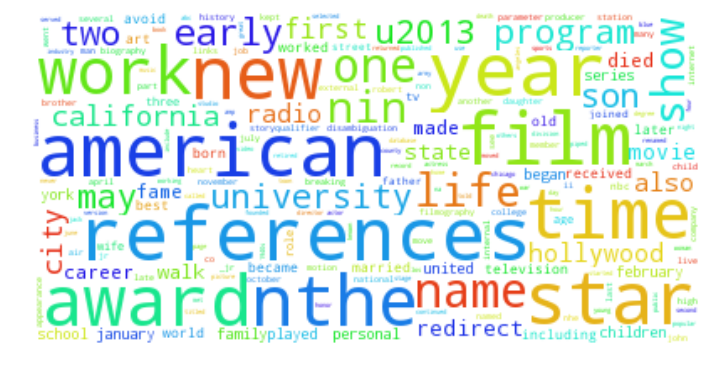

In [113]:
# Convert tokens in documents into long strings using TF-IDF scores
communityNum = 0
text = ""
token_count = 0
for token in tf_idf_comms[communityNum]:
    for i in range(int(tf_idf_comms[communityNum][token])):
        text = text + " " + token
    # Print progress
    token_count += 1
    if 100.0*token_count/len(tf_idf_comms[communityNum]) % 5 < 0.001:
        print "The loop is %f percent done" % (100.0*token_count/len(tf_idf_comms[communityNum]))

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=45,
                      background_color='white').generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

pic_name = 'word_cloud_' + str(communityNum+1) + '.jpg'
#plt.savefig(pic_name)

#### Wordcloud for community 0 and community 1 clearly shows that they are communities of actors and singers respectively  

In [251]:
def create_tf_idf(docs, log_base, output_option):
    # Convert lists of tokens to dictionaries of unique tokens with their count as values
    # This can be used for TF values for the large document
    token_dics = [{} for i in range(len(docs))]

    for idx, doc in enumerate(docs):
        for token in doc:
            if token not in token_dics[idx]:
                token_dics[idx][token] = 1
            else:
                token_dics[idx][token] += 1

    # Print number of total count for each dictionary. Should be equal to length of community documents
    for dic in token_dics:
        print sum(dic.values())

    # Calculate IDF
    token_idf = {} #Dictionary of each unique word in all documents with its IDF as value

    # Count occurence of each word in the documents
    for doc in token_dics:
        for token in doc:
            if token not in token_idf:
                token_idf[token] = 1
            else:
                token_idf[token] += 1
    # Now calculate IDF for each word. Logarithm with log_base base is used
    for token in token_idf:
        token_idf[token] = math.log(float(len(docs))/(token_idf[token]), log_base)

    # Calcualte tf-idf for each community
    tf_idf_comms = [{} for i in range(len(token_dics))] #List to contain TF-IDF for each token in each community

    for idx, doc in enumerate(token_dics):
        for token in doc:
            tf_idf_comms[idx][token] = doc[token] * token_idf[token]
    
    if output_option == 'TF':
        return token_dics
    elif output_option == 'IDF':
        return token_idf
    elif output_option == 'TF-IDF':
        return tf_idf_comms
    else:
        return "Invalid output_option"

### Category communities

In [196]:
# Now find similarities for communities. category communities
# Tokenize the pages and generate one large documents

# List to contain large document for each star community
docs = [[] for i in range(len(cat_comms))]

# Iterate through each category community
for i in range(len(docs)):
    # For each star tokenize text and extend it to document
    for star in cat_comms[i]:
        # Read wikipage from file in folder 'star_wikipages'
        name = re.sub('[ ]', '_', star)
        file_name = "star_wikipages/" + name
        f = open(file_name, "r")
        wikipage = json.dumps(f.read())
        f.close()
        tokens = list(set(tokenize(wikipage))) #List of words on star wikipage
        docs[i].extend(tokens)
    # Print progress
    print "Done with community %d out of %d" % (i+1, len(docs))
        
# Length of documents (lists)
for doc in docs:
    print len(doc)

Done with community 1 out of 5
Done with community 2 out of 5
Done with community 3 out of 5
Done with community 4 out of 5
Done with community 5 out of 5
851375
315305
441052
101484
38499


In [221]:
# Create TF-IDF values for each category community
tf_idf_comms = create_tf_idf(docs, 100, 'TF-IDF')

1122532
655545


In [206]:
# Print top 10 words for each community
for i in range(len(tf_idf_comms)):
    # Extract top 10 items with highest TF-IDF from dictionaries
    top10 = sorted(tf_idf_comms[i].iteritems(), key=lambda (k, v): (-v, k))[:10]
    print "\nTop 10 tokens for community %d:" % (i+1)
    for j in range(10):
        print top10[j][0] + ": " + str(top10[j][1])


Top 10 tokens for community 1:
1929: 15.5540570878
vitagraph: 12.581460078
1920s: 12.1622066325
1920: 12.113751626
wampas: 11.8824900737
thalberg: 11.3412902472
lasky: 10.1474702211
beery: 9.55056020813
sennett: 9.55056020813
ince: 9.43609505854

Top 10 tokens for community 2:
hosting: 3.73103550081
miniseries: 3.68258049431
mason: 3.10112041626
groening: 2.79588001734
sci: 2.7731093702
estate: 2.56811534471
lucy: 2.56811534471
rawhide: 2.44033624578
howie: 2.38764005203
hitchcock: 2.3742953187

Top 10 tokens for community 3:
keyboards: 9.15262019946
airplay: 7.43193311215
riffs: 6.64021504119
guitarists: 6.56601014309
instrumentalist: 6.36704013875
allmusic: 6.15378582601
chaka: 5.94124503686
cma: 5.94124503686
aguilera: 5.37219011707
musicianship: 5.37219011707

Top 10 tokens for community 4:
kfi: 2.7855800607
ndunning: 2.44639501518
1929: 1.93820026016
kewb: 1.74742501084
hosting: 1.64747022114
507678: 1.39794000867
chuckle: 1.39794000867
krth: 1.39794000867
kxla: 1.39794000867
whi

The loop is 5.000000 percent done
The loop is 10.000000 percent done
The loop is 15.000000 percent done
The loop is 20.000000 percent done
The loop is 25.000000 percent done
The loop is 30.000000 percent done
The loop is 35.000000 percent done
The loop is 40.000000 percent done
The loop is 45.000000 percent done
The loop is 50.000000 percent done
The loop is 55.000000 percent done
The loop is 60.000000 percent done
The loop is 65.000000 percent done
The loop is 70.000000 percent done
The loop is 75.000000 percent done
The loop is 80.000000 percent done
The loop is 85.000000 percent done
The loop is 90.000000 percent done
The loop is 95.000000 percent done
The loop is 100.000000 percent done


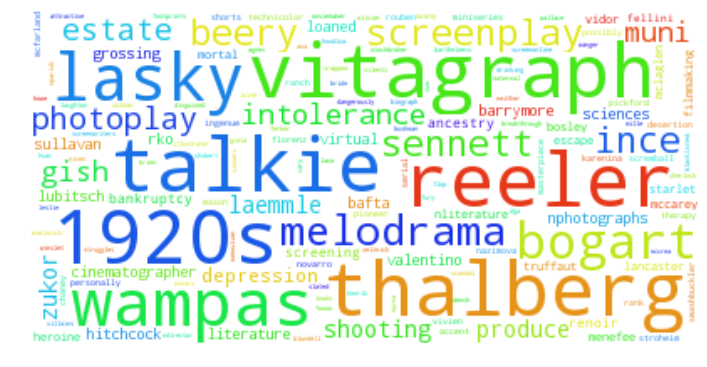

In [207]:
# Convert tokens in documents into long strings using TF-IDF scores
communityNum = 0
text = ""
token_count = 0
for token in tf_idf_comms[communityNum]:
    for i in range(int(tf_idf_comms[communityNum][token])):
        text = text + " " + token
    # Print progress
    token_count += 1
    if 100.0*token_count/len(tf_idf_comms[communityNum]) % 5 < 0.001:
        print "The loop is %f percent done" % (100.0*token_count/len(tf_idf_comms[communityNum]))

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=45,
                      background_color='white').generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

pic_name = 'word_cloud_category_' + str(communityNum+1) + '.jpg'
#plt.savefig(pic_name)

### Award communities

In [211]:
# Now find similarities for communities. award communities
# Tokenize the pages and generate one large documents

# List to contain large document for each star community
docs = [[] for i in range(len(award_comms))]

# Iterate through each award community
for i in range(len(docs)):
    # For each star tokenize text and extend it to document
    for star in award_comms[i]:
        # Read wikipage from file in folder 'star_wikipages'
        name = re.sub('[ ]', '_', star)
        file_name = "star_wikipages/" + name
        f = open(file_name, "r")
        wikipage = json.dumps(f.read())
        f.close()
        tokens = list(set(tokenize(wikipage))) #List of words on star wikipage
        docs[i].extend(tokens)
    # Print progress
    print "Done with community %d out of %d" % (i+1, len(docs))
        
# Length of documents (lists)
for doc in docs:
    print len(doc)

Done with community 1 out of 2
Done with community 2 out of 2
1122532
655545


In [222]:
# Create TF-IDF values for each award community
tf_idf_comms = create_tf_idf(docs, 100, 'TF-IDF')

1122532
655545


In [223]:
# Print top 10 words for each community
for i in range(len(tf_idf_comms)):
    # Extract top 10 items with highest TF-IDF from dictionaries
    top10 = sorted(tf_idf_comms[i].iteritems(), key=lambda (k, v): (-v, k))[:10]
    print "\nTop 10 tokens for community %d:" % (i+1)
    for j in range(10):
        print top10[j][0] + ": " + str(top10[j][1])


Top 10 tokens for community 1:
brahms: 3.3113299523
kabc: 3.16081495447
u00e9ma: 2.85978495881
kfi: 2.55875496314
woodpecker: 2.55875496314
rodeos: 2.40823996531
utilizing: 2.40823996531
128: 2.10720996965
ampas: 2.10720996965
cellist: 2.10720996965

Top 10 tokens for community 2:
dench: 1.80617997398
ritt: 1.65566497615
elle: 1.50514997832
glaucoma: 1.35463498049
gwyneth: 1.35463498049
instinctively: 1.20411998266
paltrow: 1.20411998266
aldwych: 1.05360498482
anouilh: 1.05360498482
bening: 1.05360498482


The loop is 45.000923 percent done
The loop is 50.000839 percent done
The loop is 55.000755 percent done
The loop is 60.000671 percent done
The loop is 65.000587 percent done
The loop is 70.000503 percent done
The loop is 75.000419 percent done
The loop is 80.000336 percent done
The loop is 85.000252 percent done
The loop is 90.000168 percent done
The loop is 95.000084 percent done
The loop is 100.000000 percent done


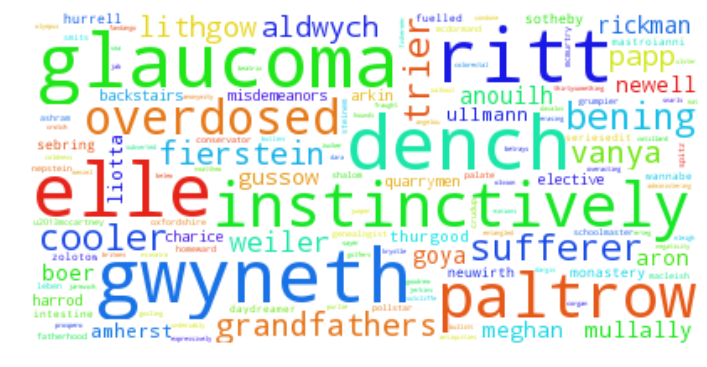

In [219]:
# Convert tokens in documents into long strings using TF-IDF scores
communityNum = 1
text = ""
token_count = 0
for token in tf_idf_comms[communityNum]:
    for i in range(int(tf_idf_comms[communityNum][token])):
        text = text + " " + token
    # Print progress
    token_count += 1
    if 100.0*token_count/len(tf_idf_comms[communityNum]) % 5 < 0.001:
        print "The loop is %f percent done" % (100.0*token_count/len(tf_idf_comms[communityNum]))

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=45,
                      background_color='white').generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

pic_name = 'word_cloud_award_' + str(communityNum+1) + '.jpg'
#plt.savefig(pic_name)

### Fictional characters communities

In [237]:
# Now find similarities for fictional character community
# Tokenize the pages and generate one large documents

# List to contain large document for each star community
docs = [[] for i in range(len([fict_comm]))]

# Iterate through each award community
for i in range(len(docs)):
    # For each star tokenize text and extend it to document
    for star in fict_comm:
        # Read wikipage from file in folder 'star_wikipages'
        name = re.sub('[ ]', '_', star)
        file_name = "star_wikipages/" + name
        f = open(file_name, "r")
        wikipage = json.dumps(f.read())
        f.close()
        tokens = list(set(tokenize(wikipage))) #List of words on star wikipage
        docs[i].extend(tokens)
    # Print progress
    print "Done with community %d out of %d" % (i+1, len(docs))
        
# Length of documents (lists)
for doc in docs:
    print len(doc)

Done with community 1 out of 1
27921


In [243]:
# Create TF-IDF values for fictional character community
tf_idf_comms = create_tf_idf(docs, 100, 'TF')

27921


In [250]:
token_dics

[{'u201cone': 1,
  'panchito': 1,
  'yellow': 6,
  'four': 15,
  'prices': 1,
  'francesco': 1,
  'woody': 5,
  'comically': 1,
  'aggression': 1,
  'marching': 1,
  'increase': 4,
  'attracted': 3,
  'electricity': 1,
  '18956204': 1,
  'hermann': 1,
  'lord': 2,
  'u20131993': 1,
  'gozira': 1,
  'u20131991': 1,
  'u20131990': 2,
  'u20131997': 2,
  'u20131996': 1,
  'u20131995': 1,
  'u20131994': 2,
  'saskatchewan': 1,
  'u20131999': 1,
  'dell': 1,
  'hdtv': 1,
  'u00e7ades': 1,
  'foul': 1,
  'chiens': 1,
  'bringing': 3,
  'elevations': 1,
  'internally': 1,
  'whitman': 2,
  'wooden': 2,
  'haber': 1,
  'nmr': 1,
  'elgar': 1,
  'succession': 1,
  'stereotypical': 2,
  'debuting': 3,
  'commented': 2,
  'pumbaa': 1,
  'tired': 2,
  'miller': 1,
  'scrapes': 1,
  'pulse': 1,
  'elections': 1,
  '270': 1,
  'hoover': 1,
  'second': 15,
  'rudman': 1,
  'valiant': 1,
  'loathing': 2,
  'chouinard': 1,
  'errors': 1,
  'roddy': 1,
  'thunder': 1,
  'cooking': 2,
  'lookback': 1,
  

In [244]:
# Print top 10 words for each community
for i in range(len(tf_idf_comms)):
    # Extract top 10 items with highest TF-IDF from dictionaries
    top10 = sorted(tf_idf_comms[i].iteritems(), key=lambda (k, v): (-v, k))[:10]
    print "\nTop 10 tokens for community %d:" % (i+1)
    for j in range(10):
        print top10[j][0] + ": " + str(top10[j][1])


Top 10 tokens for community 1:
0: 0.0
00: 0.0
000: 0.0
013639: 0.0
01996: 0.0
026310: 0.0
033: 0.0
06: 0.0
0665: 0.0
08: 0.0


In [245]:
# Convert tokens in documents into long strings using TF-IDF scores
communityNum = 0
text = ""
token_count = 0
for token in tf_idf_comms[communityNum]:
    for i in range(int(tf_idf_comms[communityNum][token])):
        text = text + " " + token
    # Print progress
    token_count += 1
    if 100.0*token_count/len(tf_idf_comms[communityNum]) % 5 < 0.001:
        print "The loop is %f percent done" % (100.0*token_count/len(tf_idf_comms[communityNum]))

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=45,
                      background_color='white').generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

pic_name = 'word_cloud_award_' + str(communityNum+1) + '.jpg'
#plt.savefig(pic_name)

The loop is 90.000882 percent done
The loop is 95.000441 percent done
The loop is 100.000000 percent done


IndexError: list index out of range